In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import seaborn as sns

# Geometric distribution

In [23]:
def gen_gem_dist(p, x):

    xs = [x for x in range(1, x)]
    ys = [((1-p) ** (x-1)) * p for x in xs]
    
    fig, ax = plt.subplots()

    ax.bar(xs, ys, width=1, edgecolor="white", linewidth=0.3)

    plt.show()

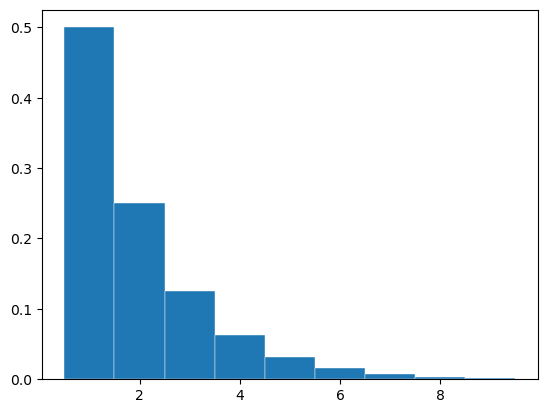

In [25]:
gen_gem_dist(0.5, 10)


In [51]:
def geom_EV(x, p):

    xs = [x for x in range(1, x+1)]
    ps = [((1-p) ** (x-1)) * p for x in xs]

    sum = 0
    for i in range(len(xs)):
        sum += xs[i] * ps[i]

    return sum

In [52]:
geom_EV(10, 0.5)

1.98828125

In [53]:
geom_EV(100, 0.5)

1.9999999999999998

# Binomial Distribution

In [28]:
def gen_bin_dist(p, n):
    ks = [k for k in range(n+1)]
    print(ks)

In [30]:
gen_bin_dist(0.5, 10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
nchoosek
n!
__
k! (n-k)!

1 out of 10:
____

10!
__
1! * (10-9)! ==

10!
__
1! * 1!

# Normal / Gaussian distribution

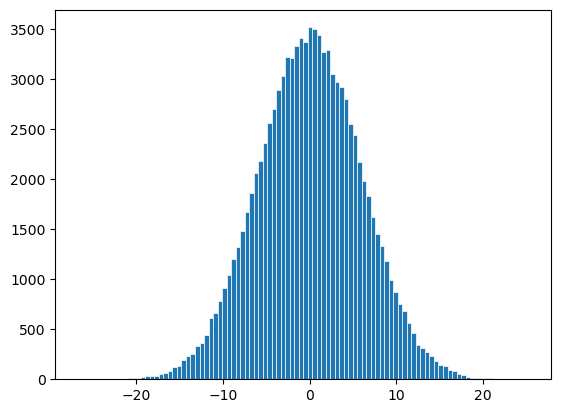

In [43]:
data_st_norm = np.random.normal(loc=0, scale=6, size=100000)  # mean=0, std=1

fig, ax = plt.subplots()

ax.hist(data_st_norm, bins=100, linewidth=0.5, edgecolor="white")

plt.show()

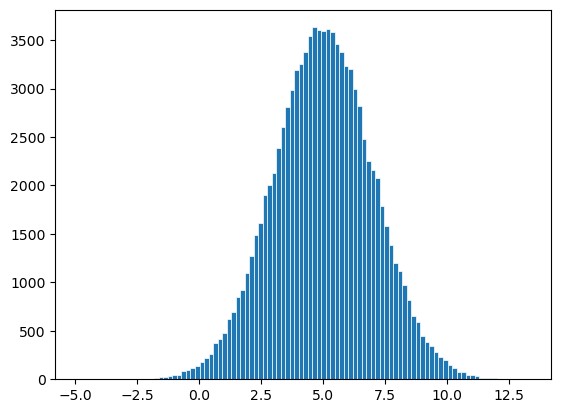

In [46]:
data_norm = np.random.normal(loc=5, scale=2, size=100000)

fig, ax = plt.subplots()

ax.hist(data_norm, bins=100, linewidth=0.5, edgecolor="white")

plt.show()

In [37]:
def normalize(array):
    sum = 0
    len = 0
    
    for i in array:
        sum += i
        len += 1

    mean = sum/len

    quadr_sum = 0
    for x_i in array:
        quadr_sum += (x_i - mean) ** 2
    variance = quadr_sum/len
    std_dev = math.sqrt(variance)

    z_scores = []
    for x_i in array:
        z_scores.append((x_i - mean)/std_dev)

    return z_scores

In [38]:
nn = normalize(data_norm)

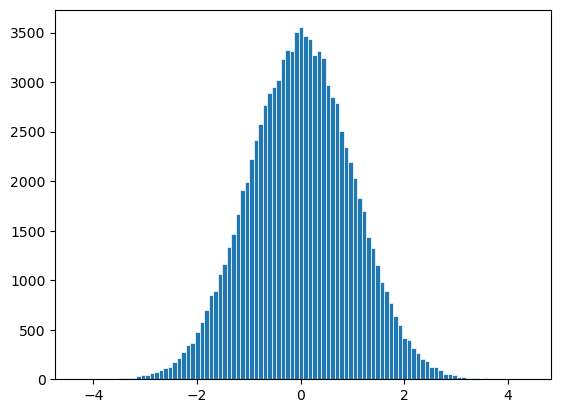

In [39]:
fig, ax = plt.subplots()

ax.hist(nn, bins=100, linewidth=0.5, edgecolor="white")

plt.show()

# Central Limit Theorem

In [13]:
# Ages follow a uniform distribution. Note: not gaussian distribution.
ages = [i for i in range(100)]
count = [1 for i in ages]

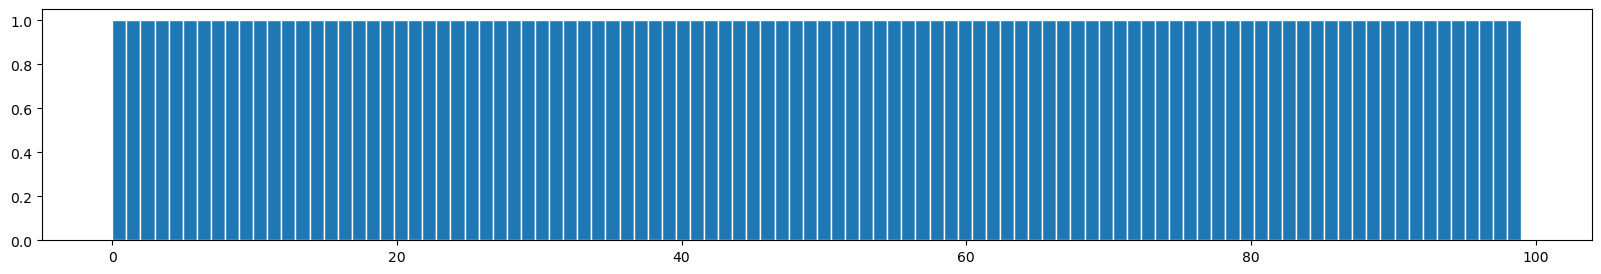

In [44]:
fig, ax = plt.subplots(figsize=(20,3))

ax.hist(ages, bins=100, linewidth=1, edgecolor="white")
plt.show()

In [38]:
def generate_samples_distributions(n=1000):
    s_means = []

    for i in range(n):
        sample = [random.choice(ages) for i in range(9)] 
        s_mean = sum(sample)/len(sample)
        s_means.append(s_mean)

    fig, ax = plt.subplots(figsize=(20,5))

    ax.hist(s_means, bins=100, linewidth=0.5, edgecolor="white")
    plt.show()

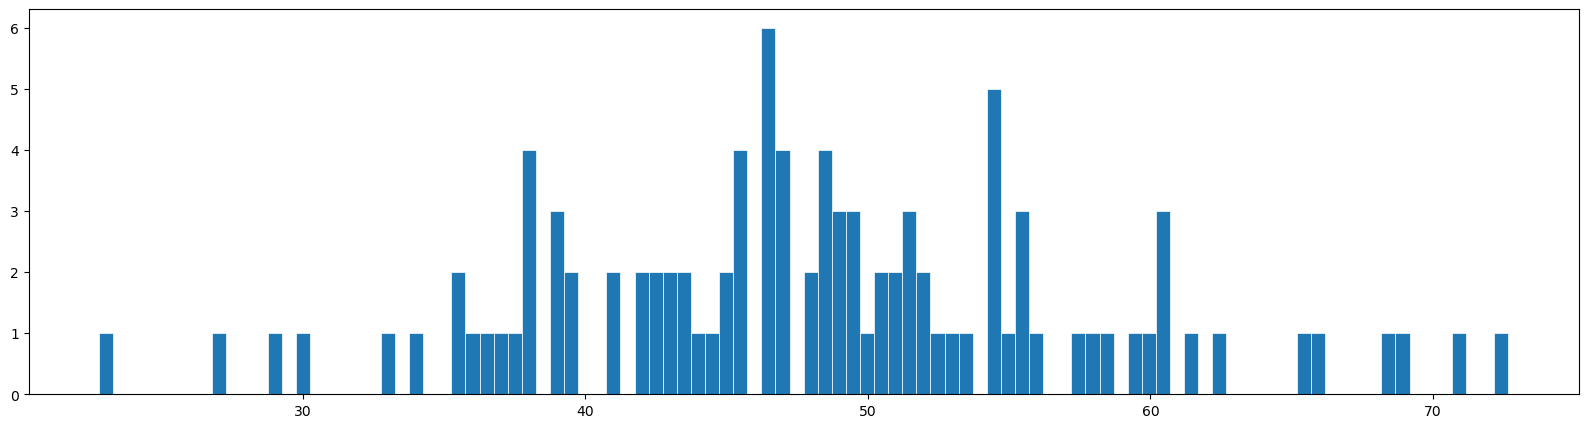

In [39]:
generate_samples_distributions(n=100)

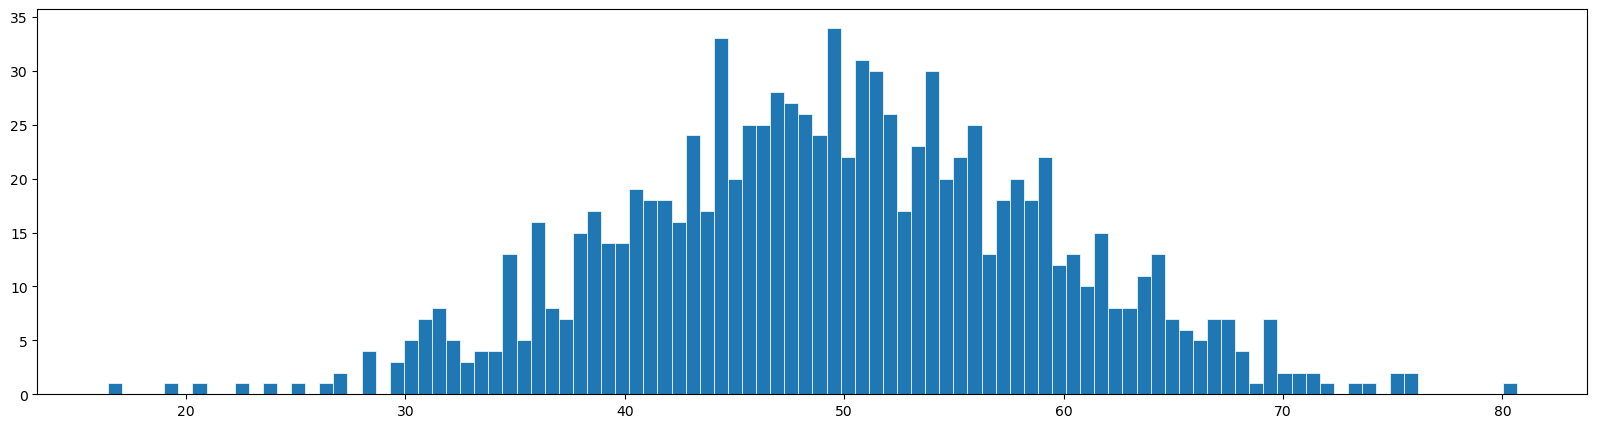

In [40]:
generate_samples_distributions(n=1000)

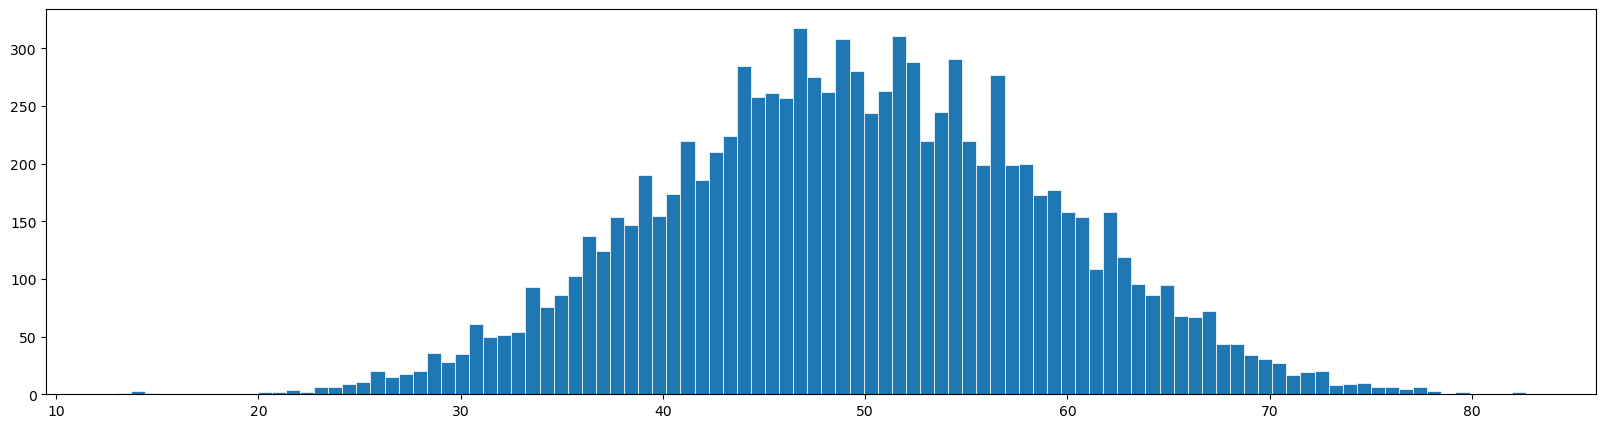

In [41]:
generate_samples_distributions(n=10000)

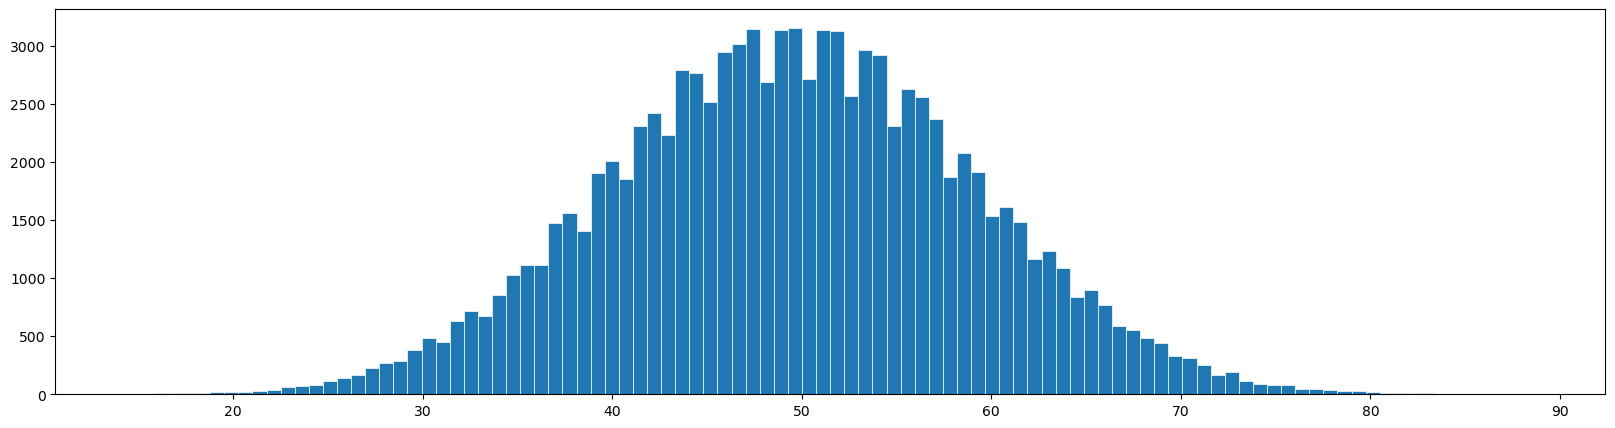

In [42]:
generate_samples_distributions(n=100000)

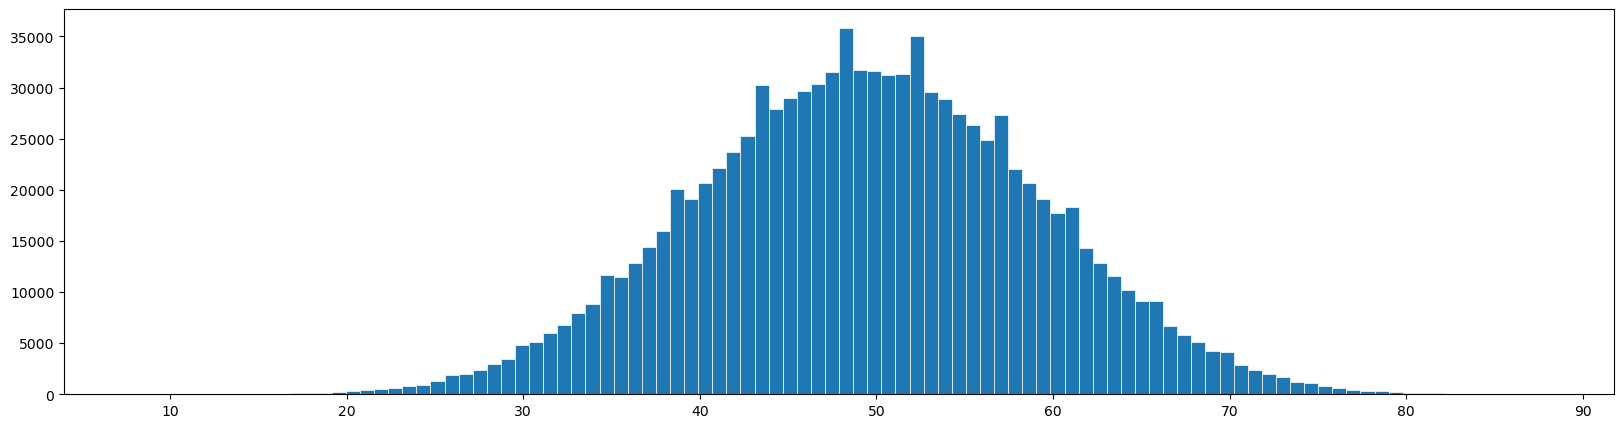

In [43]:
generate_samples_distributions(n=1000000)

# Correlation

In [150]:
df = sns.load_dataset("penguins")  # or "tips", "diamonds", etc.

In [152]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [153]:
print(df['body_mass_g'].isna().sum())
df['flipper_length_mm'].isna().sum()

2


2

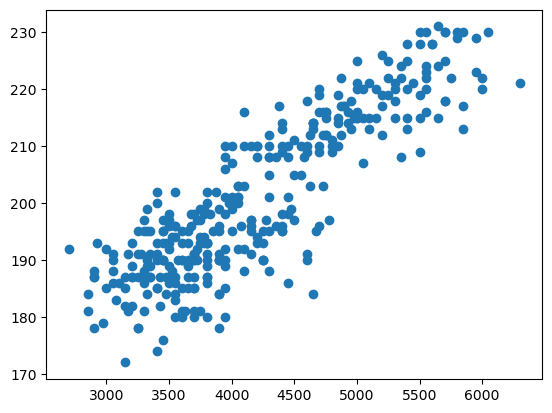

In [154]:
fig, ax = plt.subplots()

ax.scatter(df['body_mass_g'], df['flipper_length_mm'])

plt.show()

/home/anasteisha/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


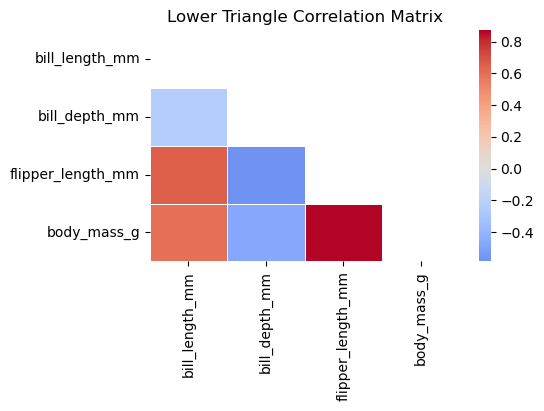

In [155]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr(method='pearson') 

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(5, 3))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Lower Triangle Correlation Matrix")
plt.show()

In [156]:
X = list(df['body_mass_g'].dropna())
Y = list(df['flipper_length_mm'].dropna())

In [157]:
def COV(X, Y):
    mew_X = sum(X)/len(X)
    mew_Y = sum(Y)/len(Y)

    summ = 0
    for i in range(len(X)):
        summ += (Xs[i] - mew_X) * (Ys[i] - mew_Y)
        
    E = summ/len(X)
    
    return E

In [158]:
def VAR(X):
    
    mew_X = sum(X)/len(X)
    
    summ = 0
    
    for i in range(len(X)):
        summ += (X[i] - mew_X) ** 2
        
    var = summ/len(X)
    
    return var

In [159]:
def CORR_COEFF(X, Y):
    high = COV(X, Y)
    low = math.sqrt(VAR(X) * VAR(Y))
    corr_coeff = high/low
    return corr_coeff

In [160]:
CORR_COEFF(X, Y)

TypeError: 'float' object is not callable

In [147]:
# Comparing with built-in function
np.corrcoef(X, Y)

array([[1.        , 0.87120177],
       [0.87120177, 1.        ]])

# Sampling distribution

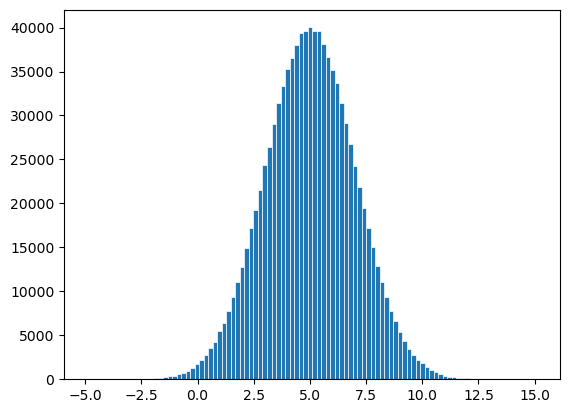

In [3]:
data_norm = np.random.normal(loc=5, scale=2, size=1000000) # a million of cases

fig, ax = plt.subplots()

ax.hist(data_norm, bins=100, linewidth=0.5, edgecolor="white")

plt.show()

In [4]:
def generate_samples(data, sample_size=10, samples_amount=100):
    
    samples = []

    for k in range(samples_amount):
        sample = []
        for i in range(sample_size):
            sample.append(random.choice(data))
        samples.append(sample)
    return samples

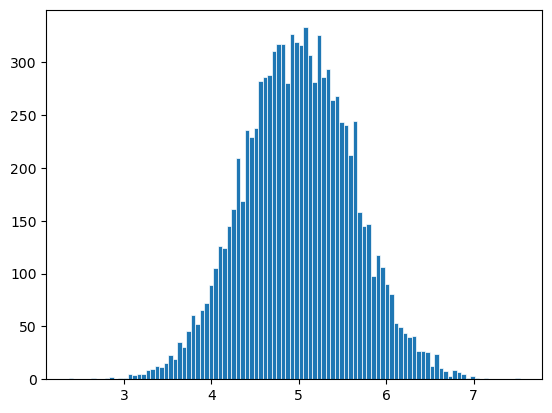

In [6]:
samples_1 = generate_samples(data_norm, sample_size=10, samples_amount=10000)

means_1 = []

for el in samples_1:
    mean = sum(el)/len(el)
    means_1.append(mean)

fig, ax = plt.subplots()

ax.hist(means_1, bins=100, linewidth=0.5, edgecolor="white")

plt.show()

In [7]:
samples_2 = generate_samples(data_norm, sample_size=30, samples_amount=1000000)

In [8]:
means_2 = []

for el in samples_2:
    mean = sum(el)/len(el)
    means_2.append(mean)

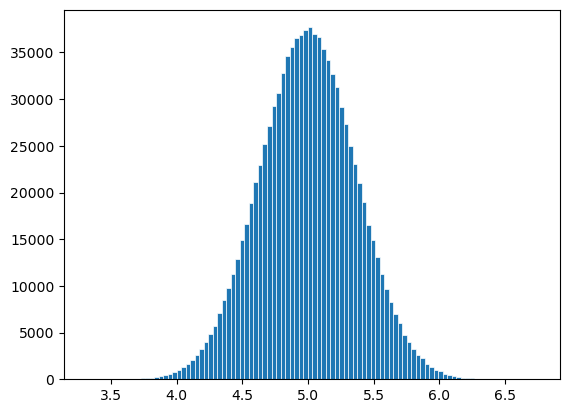

In [9]:
fig, ax = plt.subplots()

ax.hist(means_2, bins=100, linewidth=0.5, edgecolor="white")

plt.show()

In [10]:
mew = sum(data_norm)/len(data_norm)

In [11]:
def calculate_standard_error_empirically(samples, mew):
    
    means = []

    for el in samples:
        mean = sum(el)/len(el)
        means.append(mean)

    variances = []
    for i in means:
        var_i = (i - mew) ** 2
        variances.append(var_i)

    var = sum(variances) / len(variances)
    std_dev = math.sqrt(var)
    return var, std_dev

In [12]:
def calculate_SE_formally(variance, n):
    std_dev = math.sqrt(variance)
    root_n = math.sqrt(n)
    SE = std_dev / root_n
    return SE

In [57]:
calculate_standard_error_empirically(samples_3, mew)

(0.13416388920611166, 0.36628389154604063)

In [58]:
calculate_SE_formally(2, 30)

0.25819888974716115

In [59]:
calculate_SE_formally(2, 100000)


0.004472135954999579